<h1 style="text-align: center;">Travel Insurance Classifiation</h1>
<h3 style="text-align: center;">Muhammad Fa'iz Ismail</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**

Travel insurance is essential for travelers to protect themselves during domestic and international trips. With increasing requirements for travel insurance in regions like Europe and America, insurance companies aim to provide reliable services and ensure proper risk management. To improve business outcomes, an insurance company needs to understand the behavior of policyholders, specifically those who file insurance claims. By analyzing historical policyholder data—including travel destinations, product purchases, and demographic attributes—the company can identify patterns and key indicators associated with insurance claims.

**1.2 Problem Statements**

Managing insurance claims can consume significant time and resources if the company cannot identify high-risk customers who are likely to file claims. The insurance company aims to improve risk management efficiency by predicting which customers are unlikely to file claims, allowing them to focus more on the high-risk customer segment.

If insurance policies are offered at the same premium to all customers without considering their risk levels, the cost could become less effective as the potential claims are not reflected in the company's risk management strategy.

**1.3 Goals**

Based on this problem, the insurance company wants to have the ability to predict the likelihood of a customer filing an insurance claim or not, allowing them to focus their risk management efforts on customers with a high potential for claims.

In addition, the company also wants to identify the factors or variables that influence a customer to file a claim, enabling them to develop better strategies for setting premiums, managing risks, and improving operational efficiency.

**1.4 Analytical Approach**

In this analysis, we focus on predictive modeling to identify patterns in travel insurance claims. The developed model helps the insurance company predict the probability of a policyholder filing a claim or not.

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

- **Business Metric**
In the travel insurance industry, several important business metrics are used to measure business performance and ensure operational efficiency. Here are some of the metrics that this project will focus on :
  1. Premium Metrics
     - **Gross Written Premium (GWP)**: Total nilai premi yang ditulis oleh perusahaan selama periode tertentu, termasuk premi yang belum diterima
     - **Net Earned Premium (NEP)**: Premi yang benar-benar diakui sebagai pendapatan setelah memperhitungkan risiko yang diasuransikan selama periode tertentu.
  2. Loss Metrics
     - **Loss Ratio**: Rasio klaim yang dibayarkan terhadap premi yang diperoleh 
     - **Severity of Claims**: Rata-rata biaya per klaim

- **Machine Learning Evaluation Metric**
  
  - Type 1 Error: False Positive (Model predicts no claims when in fact there are no claims)
      The bottom line:
      Overallocation of claim reserves
      Setting premiums too high, resulting in loss of potential customers
      Inefficiencies in the company’s capital management

  - Type 2 Error: False Negative (Model predicts no claims when in fact there are claims)
      The bottom line:
      Insufficient claim reserves
      Potential liquidity issues when paying claims
      Risk of unanticipated financial losses

   Based on the consequences, the model’s primary focus is to minimize False Positives because their financial impact is more significant to the company’s operational efficiency.

   The main metric ROC-AUC was chosen because:
   - It provides a balance between True Positive Rate and False Positive Rate
   - It is not affected by class imbalance
   - It helps optimize the threshold to minimize False Positives while maintaining the ability to identify correct claims

   The model has achieved these goals well, as indicated by the high precision for the non-claim class and the satisfactory ROC-AUC score.

**1.6 Success Criteria**

A machine learning classification in travel insurance can be considered successful if it meets the following criteria, which depend on the specific purpose of the model. Here are the points of success:

1. Model Accuracy Above 85%
   - Accuracy indicates the proportion of correct predictions, but in the insurance industry, data is often imbalance
   - Therefore, an accuracy above 85% is considered sufficiently reliable

2. Precision Above 85%
   - High precision indicates the model's ability to identify valid claims with a low error rate
   - Prevents financial leakage. Each fraudulent claim has a direct impact on profitability

3. Recall Above 70%
   - For risk detection models, to ensure that high-risk or fraudulent claims are not missed
   - A KPMG (2023) study indicates that overly strict insurance approaches can reduce customer retention by up to 15%

## **Section 2. Data Understanding**

In [516]:
# Library

import pandas as pd
import numpy as np
import missingno

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OneHotEncoder, TargetEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from scipy.stats import chi2_contingency

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from category_encoders import BinaryEncoder
from collections import Counter


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

**2.1 General Information**

| Attribute                | Data Type       | Description                                                           |
|--------------------------|-----------------|-----------------------------------------------------------------------|
| Agency                   | Object            | Name of the insurance agency issuing the policy                                   |
| Agency Type              | Object            | Category or type of travel insurance agency       |
| Distribution Channel     | Object            | Method of selling insurance products |
| Product Name             | Object            |  Official name of a specific travel insurance product                       |
| Gender                   | Object            | Gender of the insured person (M, F)                                   |
| Duration                 | Integer         | Duration of travel in days                                            |
| Destination              | Object            | Travel destination of the insured person                              |
| Net Sales                | Float           | Amount of sales generated by the travel insurance policy              |
| Commision (in value)     | Float           | Commission earned by the agency for the insurance policy              |
| Age                      | Integer         | Age of the insured person                                             |
| Claim                    | Object            | Claim status (Yes, No) indicating whether a claim was made against the policy |

**2.2 Feature Information**

| Feature | Impact to Business |
|---------| ------------------ |
|Agency | Helps understand sales patterns and contributions from each agency |
| Agency Type  | Determines which agency type is more effective in selling insurance products |
| Distribution Channel | Measures the effectiveness of each distribution channel in attracting customers |
| Product Name | Evaluates underperforming products for innovation or feature improvements | 
| Gender | Analyzes differences in behavior based on gender |
| Duration | Helps set accurate pricing for premiums based on duration risk |
| Destination | Helps segment the market based on popular destinations and Determines premium pricing strategies based on destination risks |
| Net Sales | Forms the basis for strategies to boost sales and increase company revenue | 
| Commission (in value) | Forms a basis for designing balanced incentive schemes for agencies |
| Age | Helps segment the market to design products and premium pricing tailored to age demographics.Helps segment the market to design products and premium pricing tailored to age demographics | 


**2.3 Statistics Summary**

In [517]:
df = pd.read_csv(r'D:\Purwadhika\Module 3. Machine Learning\Capstone\travel_insurance\data\raw\data_travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [519]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [520]:
df.describe(include='object')

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [521]:
# Check missing values
print("Total rows that have missing values: ", df.isnull().sum().sum())

Total rows that have missing values:  31647


In [522]:
df.isna().sum()/len(df.index)*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Gender                  71.392799
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Age                      0.000000
Claim                    0.000000
dtype: float64

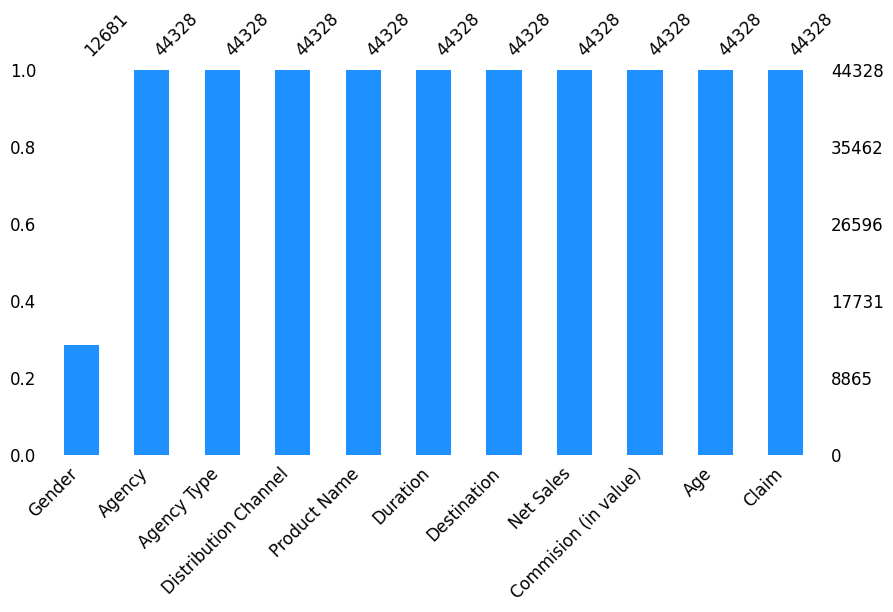

In [523]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

<Axes: >

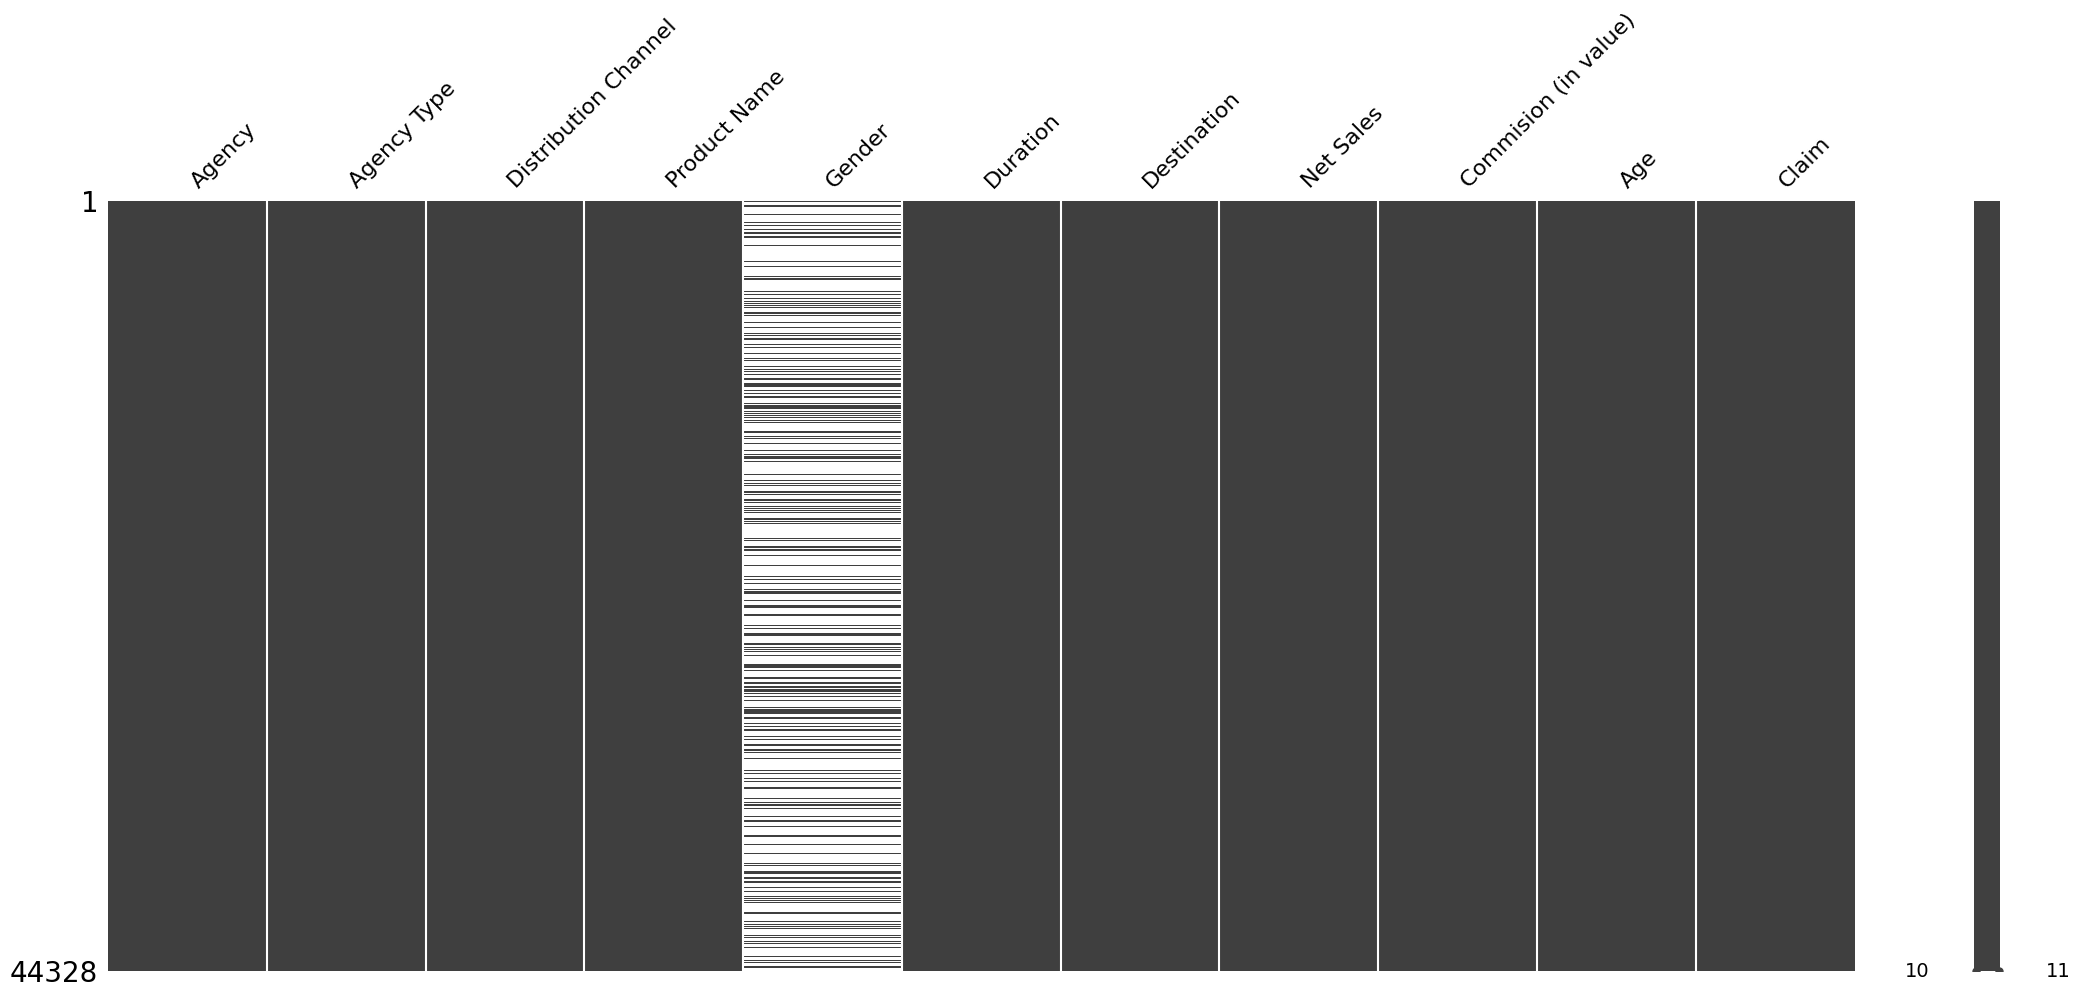

In [524]:
missingno.matrix(df)

In [525]:
clean_df = df.drop(['Gender'], axis=1)
clean_df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


**3.2 Duplicated Values**

In [526]:
# Duplicated rows
print("Total duplicated rows: ", clean_df.duplicated().sum())

Total duplicated rows:  5004


In [527]:
cleaned_df = clean_df.drop_duplicates(keep='first').reset_index(drop=True)
cleaned_df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
39319,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
39320,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
39321,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
39322,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


**3.3 Identify Spelling Errors**

In [528]:
# Data Cleaning - Categoric Variable

categoric_features = cleaned_df.select_dtypes('object')

for col in categoric_features.columns:
    print(f"Total category on '{col}': {cleaned_df[col].nunique()}")

Total category on 'Agency': 16
Total category on 'Agency Type': 2
Total category on 'Distribution Channel': 2
Total category on 'Product Name': 26
Total category on 'Destination': 138
Total category on 'Claim': 2


In [529]:
pip install pycountry pycountry-convert


Note: you may need to restart the kernel to use updated packages.


In [530]:
for col in categoric_features.columns:
    print(f"Column: {col}")
    print(cleaned_df[col].value_counts())
    print()

Column: Agency
Agency
EPX    20990
CWT     5726
C2B     5334
JZI     4233
SSI      711
LWC      452
RAB      440
TST      329
JWT      284
KML      229
ART      226
CCR      114
CSR       68
CBH       67
TTW       66
ADM       55
Name: count, dtype: int64

Column: Agency Type
Agency Type
Travel Agency    28096
Airlines         11228
Name: count, dtype: int64

Column: Distribution Channel
Distribution Channel
Online     38613
Offline      711
Name: count, dtype: int64

Column: Product Name
Product Name
Cancellation Plan                       11009
2 way Comprehensive Plan                 8133
Rental Vehicle Excess Insurance          5726
Basic Plan                               3638
Bronze Plan                              2634
1 way Comprehensive Plan                 1848
Value Plan                               1549
Silver Plan                              1480
Annual Silver Plan                        849
Ticket Protector                          711
Travel Cruise Protect            

**3.4 Identify Anomaly Values**
- Check Distribution (Numerical Variable)


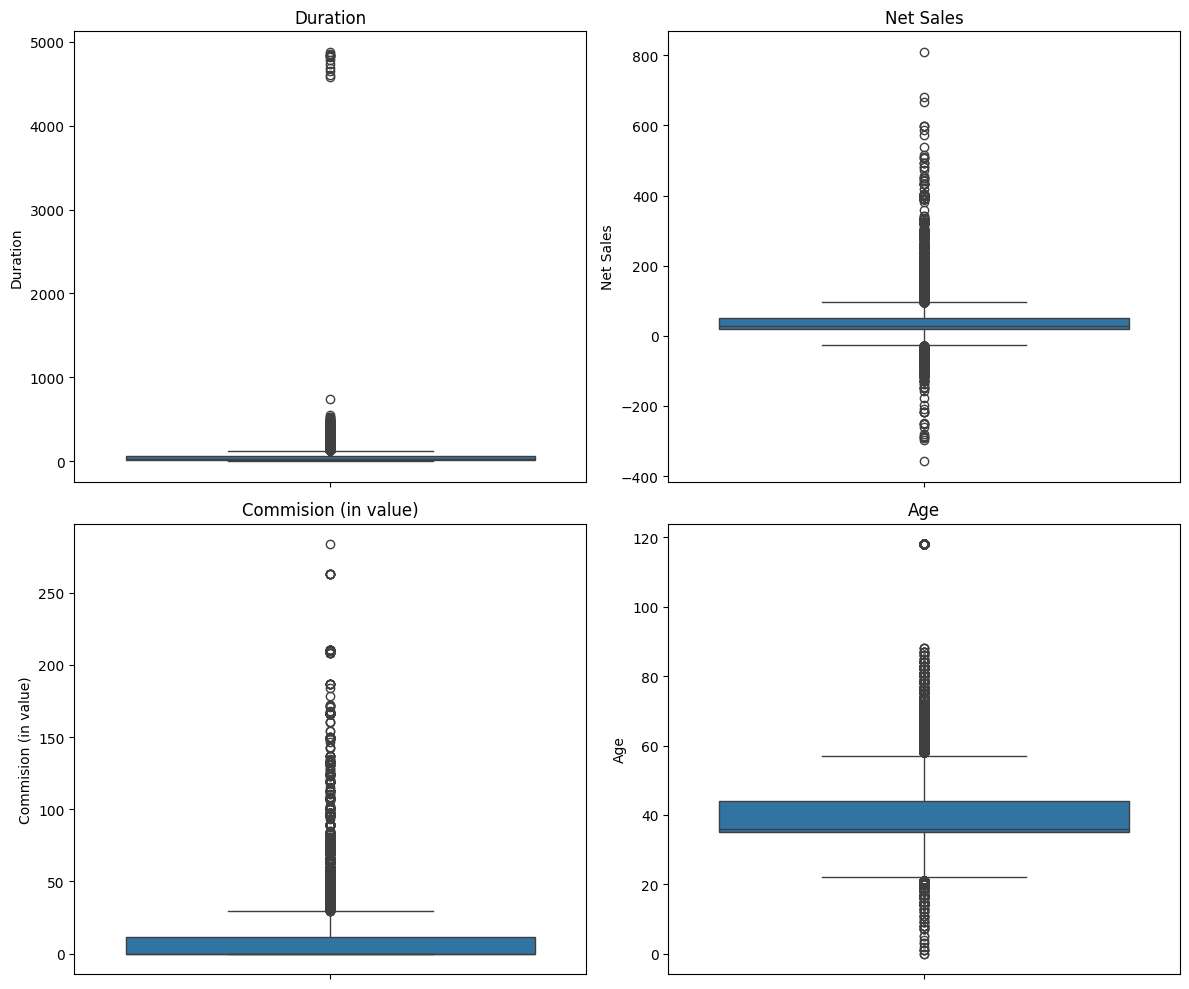

In [531]:
# Identify numeric features
numeric_features = cleaned_df.drop('Claim', axis=1).select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 10))
for idx, feature in enumerate(numeric_features, start=1):
    sns.boxplot(cleaned_df[feature], ax=plt.subplot(2, 2, idx))
    plt.subplot(2, 2, idx).set_title(feature)
plt.tight_layout()
plt.show()

In [532]:
filtered_df = cleaned_df[(cleaned_df['Duration'] <= 4000) & (cleaned_df['Age'] <= 100)]

In [533]:
print(f"Jumlah data sebelum filter: {len(cleaned_df)}")
print(f"Jumlah data setelah filter: {len(filtered_df)}")

Jumlah data sebelum filter: 39324
Jumlah data setelah filter: 38888


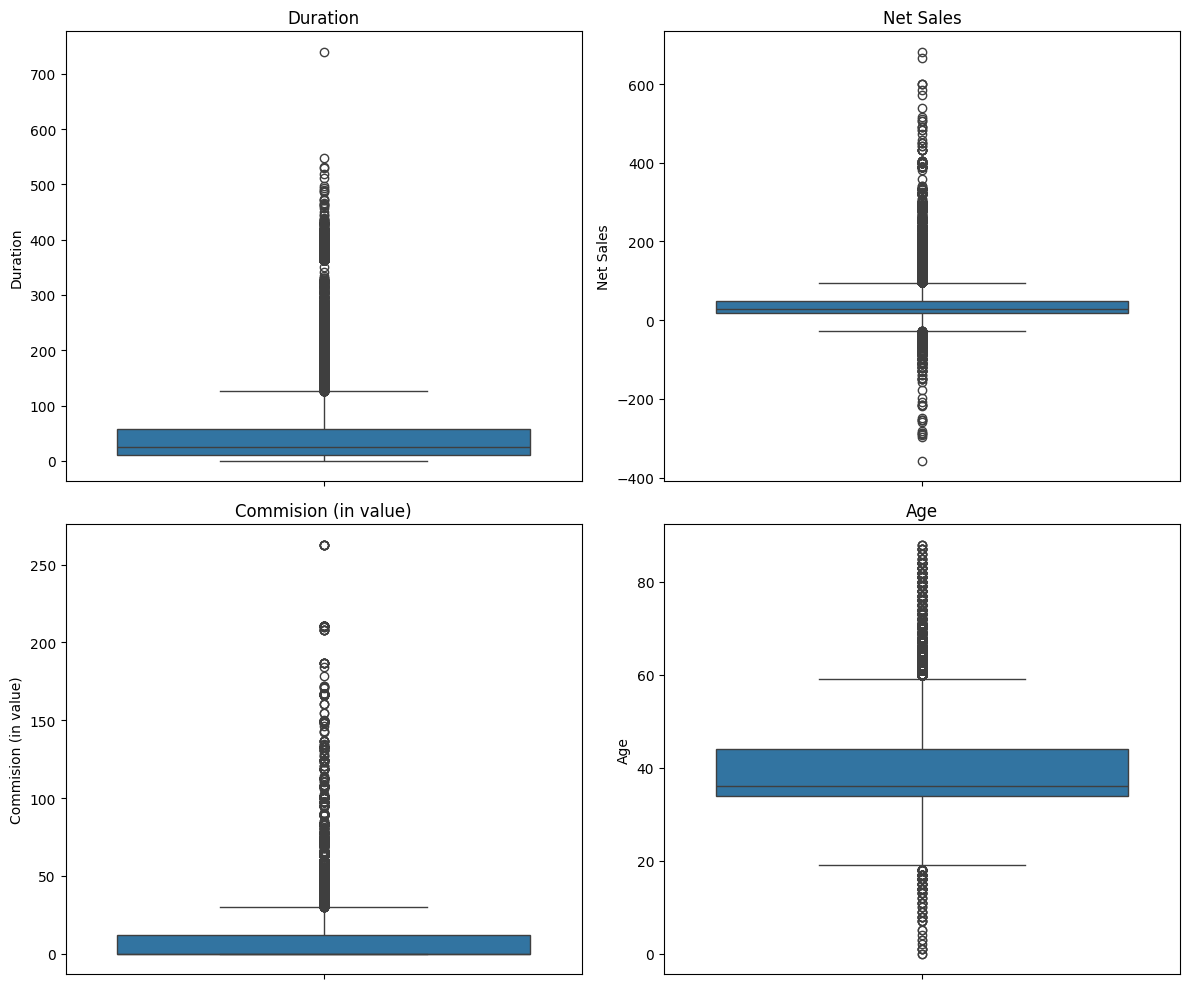

In [534]:
# Identify numeric features
numeric_features = filtered_df.drop('Claim', axis=1).select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 10))
for idx, feature in enumerate(numeric_features, start=1):
    sns.boxplot(filtered_df[feature], ax=plt.subplot(2, 2, idx))
    plt.subplot(2, 2, idx).set_title(feature)
plt.tight_layout()
plt.show()

- Check Cardinality (Categorical Variable)

In [535]:
categorical_features = filtered_df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    print(f"Total unique values on `{feature}`: {filtered_df[feature].nunique()}")
    print(filtered_df[feature].value_counts(normalize=True))
    print()

Total unique values on `Agency`: 15
Agency
EPX    0.539009
CWT    0.147218
C2B    0.137163
JZI    0.107617
SSI    0.017769
LWC    0.011623
RAB    0.011315
TST    0.008460
KML    0.005889
ART    0.004937
CCR    0.002443
CSR    0.001749
CBH    0.001723
TTW    0.001697
ADM    0.001389
Name: proportion, dtype: float64

Total unique values on `Agency Type`: 2
Agency Type
Travel Agency    0.721199
Airlines         0.278801
Name: proportion, dtype: float64

Total unique values on `Distribution Channel`: 2
Distribution Channel
Online     0.983157
Offline    0.016843
Name: proportion, dtype: float64

Total unique values on `Product Name`: 26
Product Name
Cancellation Plan                       0.283044
2 way Comprehensive Plan                0.208522
Rental Vehicle Excess Insurance         0.147218
Basic Plan                              0.092548
Bronze Plan                             0.067733
1 way Comprehensive Plan                0.047444
Silver Plan                             0.038058
Val

In [536]:
filtered_df.to_csv('clean_dataset.csv')

## **Section 4. Data Generation**

**4.1 Constructing `Seen` and `Unseen` Data**

In [537]:
# Define feature and target
feature = filtered_df.drop('Claim', axis=1)
target = filtered_df['Claim']

In [538]:
# Split data into Seen (80%) and Unseen (20%)
seen_data, unseen_data = train_test_split(filtered_df, test_size=0.2, random_state=42, stratify= target)

In [539]:
# Check the shape of each dataset
seen_shape = seen_data.shape
unseen_shape = unseen_data.shape

In [540]:
seen_shape, unseen_shape

((31110, 10), (7778, 10))

## **Section 5. Exploratory Data Analysis (EDA)**

**5.1 Analysis 1**

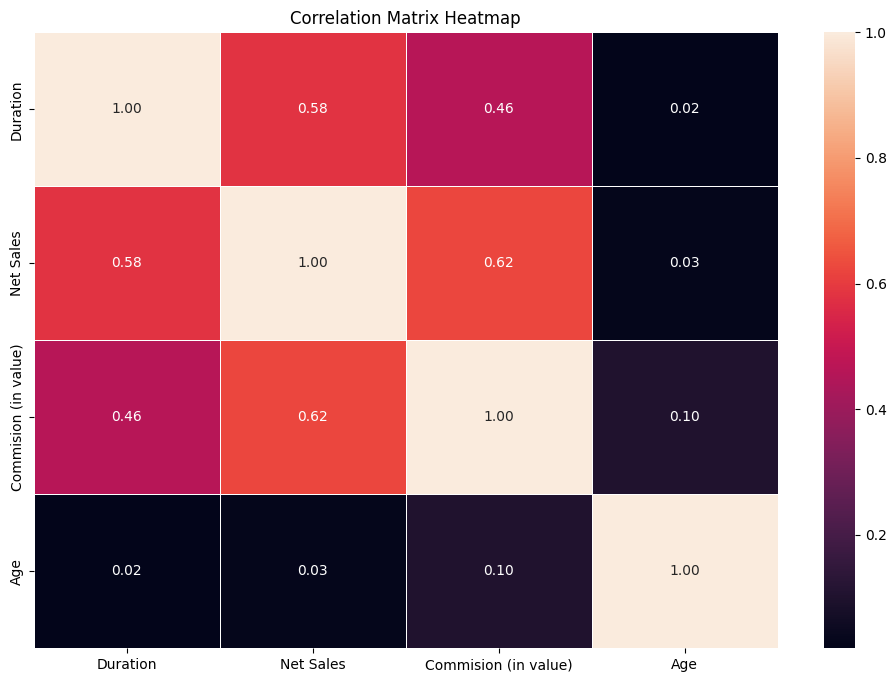

In [541]:
# Select only numeric columns from the data
numeric_data = seen_data.select_dtypes(include=['number'])

# Calculate the correlation matrix on numeric data only
correlation_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


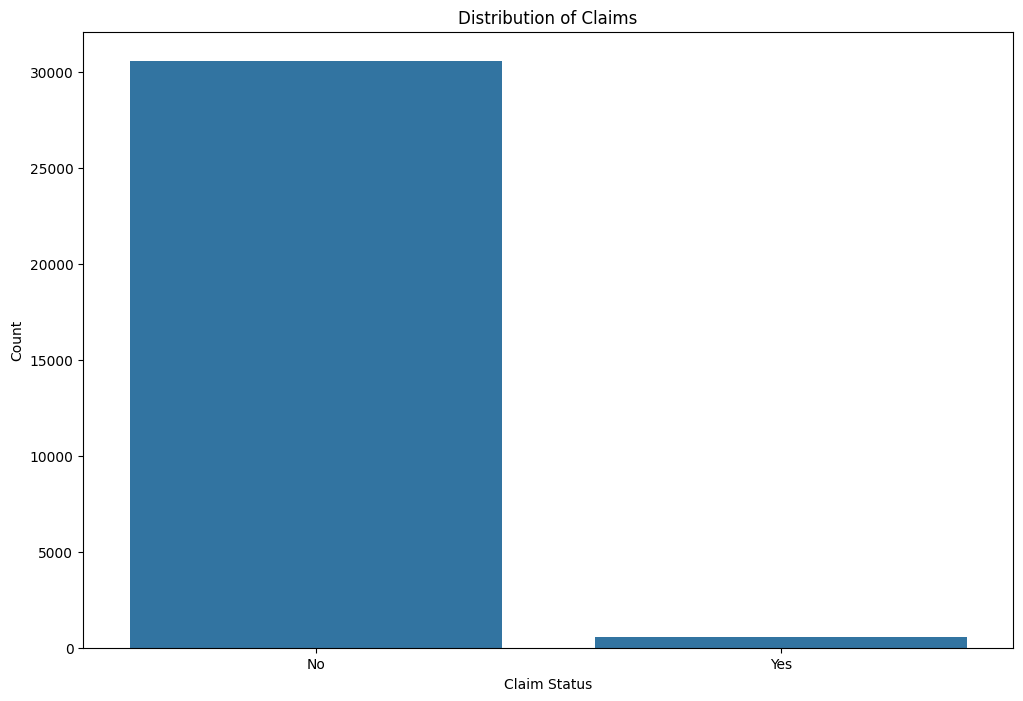

Claim
No     30577
Yes      533
Name: count, dtype: int64

In [542]:
claim_distribution = seen_data['Claim'].value_counts()
plt.figure(figsize=(12, 8))
sns.countplot(x='Claim', data=seen_data)
plt.title('Distribution of Claims')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

claim_distribution

**5.2 Analysis 2**

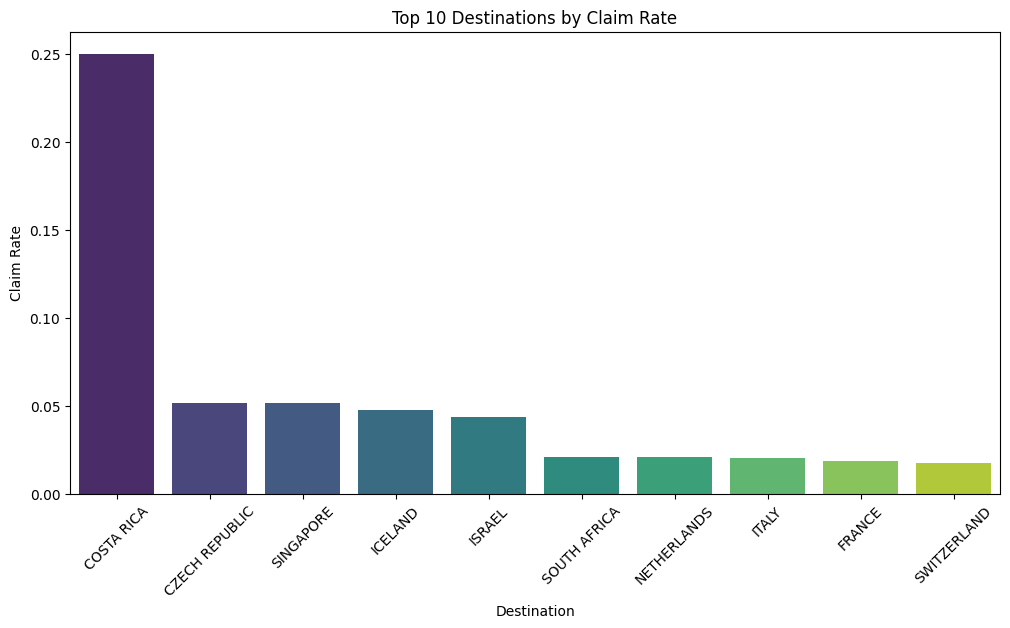

In [543]:
# Convert 'Claim' to a binary column for easier analysis
seen_data['Claim_Binary'] = seen_data['Claim'].apply(lambda x: 1 if x == 'Yes' else 0)

# Destination vs. Claim Rate
claim_rate_by_destination = seen_data.groupby('Destination')['Claim_Binary'].mean().sort_values(ascending=False).head(10)

# Plot Claim Rate by Destination
plt.figure(figsize=(12, 6))
sns.barplot(x=claim_rate_by_destination.index, y=claim_rate_by_destination.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Destinations by Claim Rate")
plt.ylabel("Claim Rate")
plt.xlabel("Destination")
plt.show()

**5.3 Analysis 3**

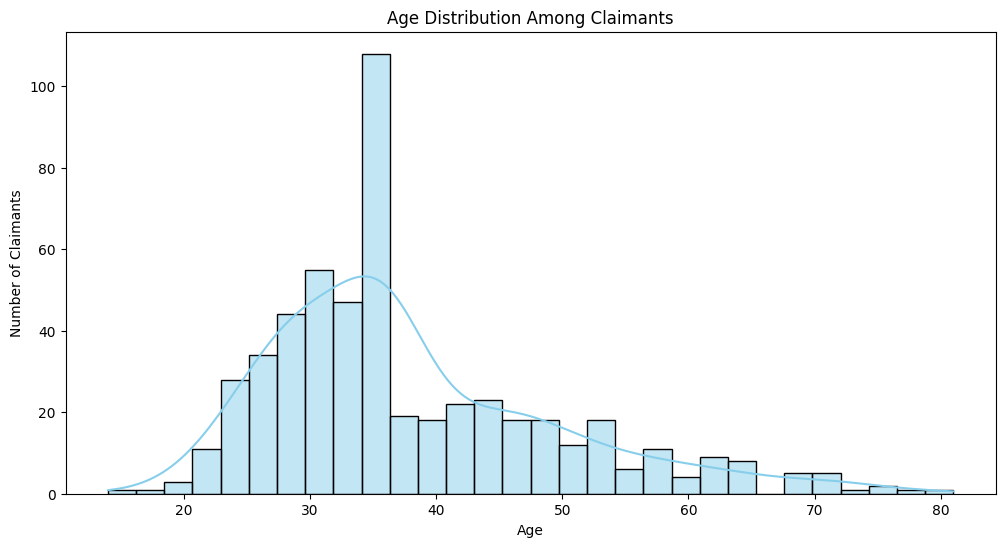

In [544]:
# Age Distribution Among Claimants
claimants_age = seen_data[seen_data['Claim'] == 'Yes']['Age']

# Plot Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(claimants_age, bins=30, kde=True, color='skyblue')
plt.title("Age Distribution Among Claimants")
plt.xlabel("Age")
plt.ylabel("Number of Claimants")
plt.show()

In [545]:
def cat_age(age):
    if age <= 17:
        return "Kid"
    elif 18 <= age <= 30:
        return "Young"
    elif 31 <= age <= 50:
        return "Mature"
    elif 51 <= age <= 65:
        return "Senior"
    elif age > 65:
        return "Old"
    else:
        return None
seen_data['category_age'] = seen_data['Age'].apply(cat_age)

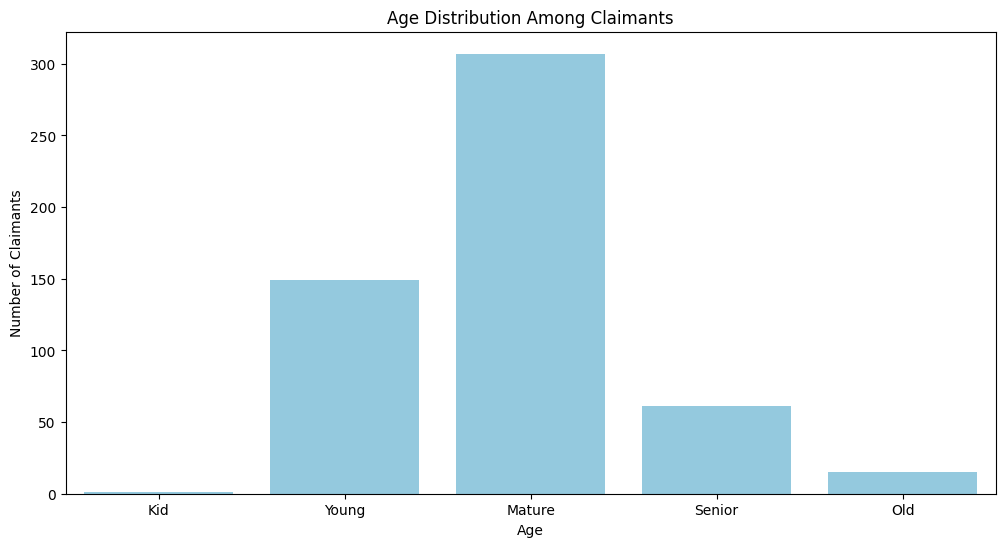

In [546]:
# Age Distribution Among Claimants
claimants_age = seen_data[seen_data['Claim'] == 'Yes']['category_age']
age_order = ["Kid", "Young","Mature", "Senior", "Old"]

# Plot Age Distribution as Bar Chart
plt.figure(figsize=(12, 6))
sns.countplot(data=seen_data[seen_data['Claim'] == 'Yes'], x='category_age', color='skyblue', order = age_order )
plt.title("Age Distribution Among Claimants")
plt.xlabel("Age")
plt.ylabel("Number of Claimants")
plt.show()

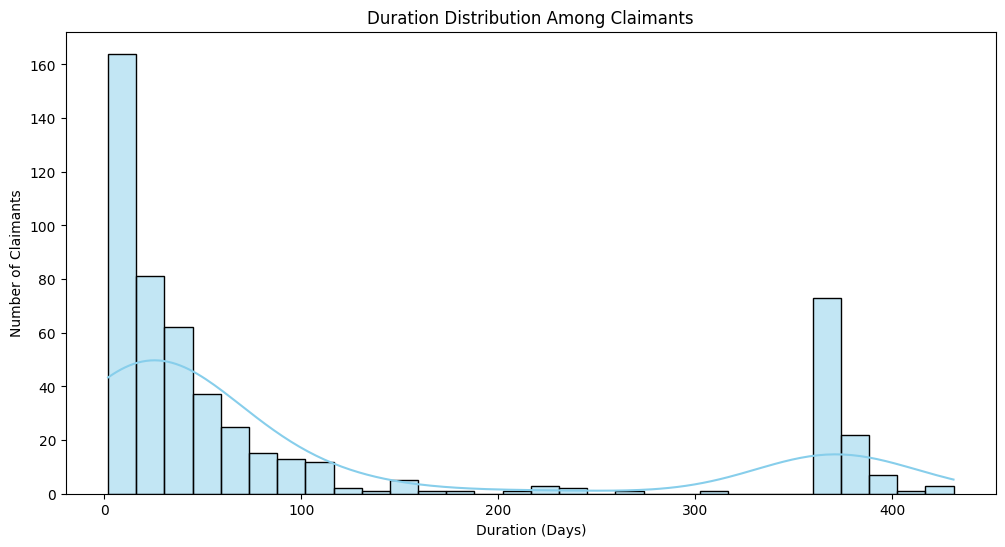

In [547]:
# Age Distribution Among Claimants
claimants_duration = seen_data[seen_data['Claim'] == 'Yes']['Duration']

# Plot Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(claimants_duration, bins=30, kde=True, color='skyblue')
plt.title("Duration Distribution Among Claimants")
plt.xlabel("Duration (Days)")
plt.ylabel("Number of Claimants")
plt.show()

In [548]:
def cat_duration(dur):
    if dur < 7:
        return "< 1 week"
    elif 7 <= dur <= 14:
        return "1-2 weeks"
    elif 15 <= dur <= 21:
        return "2-3 weeks"
    elif 22 <= dur <= 28:
        return "3-4 weeks"
    elif 29 <= dur <= 60:
        return "1-2 months"
    elif 61 <= dur <= 90:
        return "2-3 months"
    elif  dur > 90:
        return ">3 months"
    else:
        return None
seen_data['category_duration'] = seen_data['Duration'].apply(cat_duration)

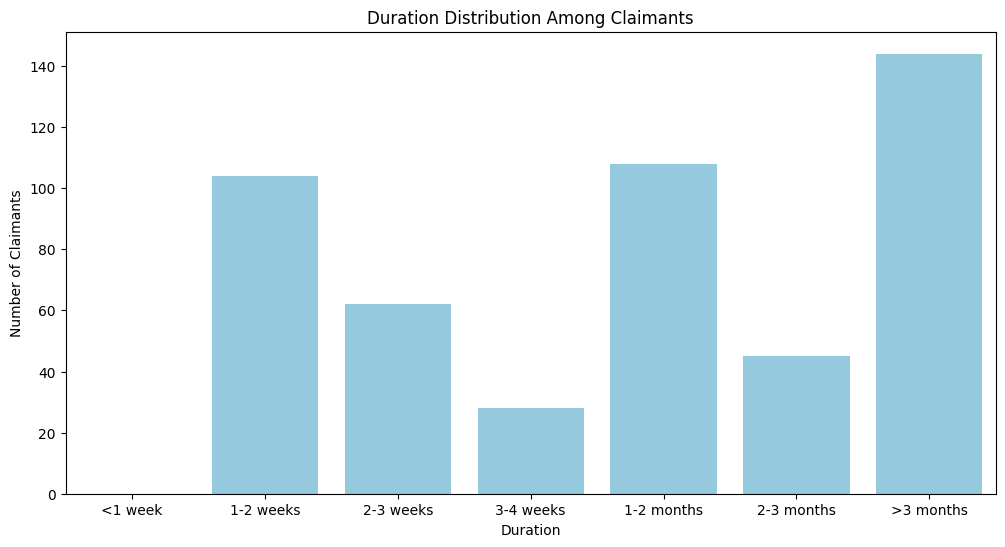

In [549]:
# Age Distribution Among Claimants
claimants_dur = seen_data[seen_data['Claim'] == 'Yes']['category_duration']
dur_order = ['<1 week', '1-2 weeks', '2-3 weeks', '3-4 weeks', '1-2 months', '2-3 months', '>3 months']

# Plot Age Distribution as Bar Chart
plt.figure(figsize=(12, 6))
sns.countplot(data=seen_data[seen_data['Claim'] == 'Yes'], x='category_duration', color='skyblue', order = dur_order )
plt.title("Duration Distribution Among Claimants")
plt.xlabel("Duration")
plt.ylabel("Number of Claimants")
plt.show()

**5.4 Analysis 4**

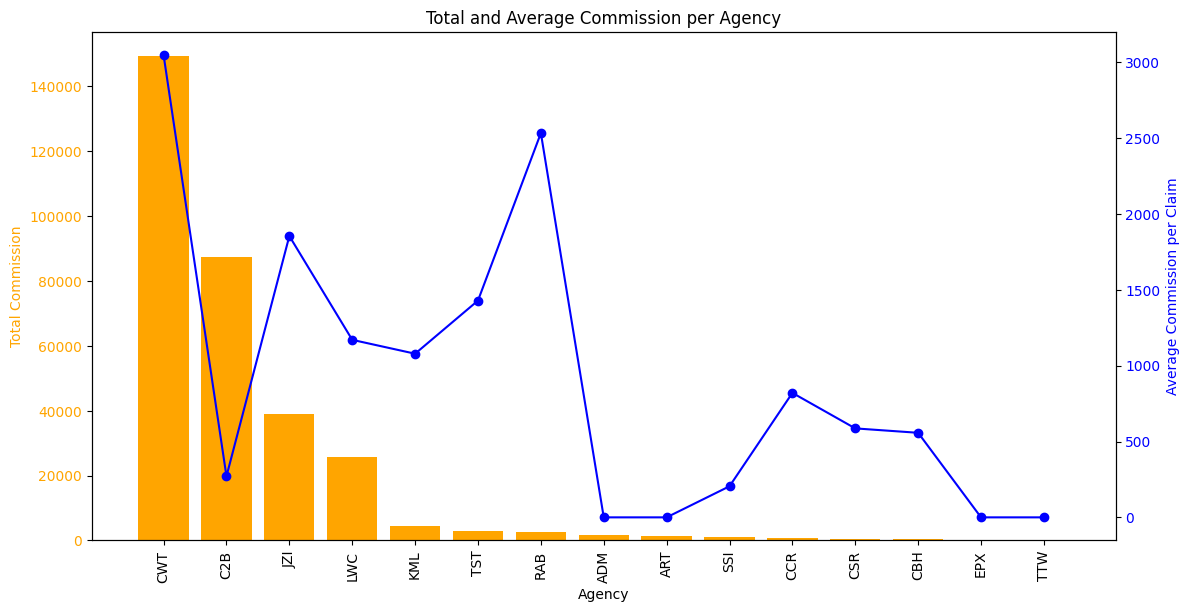

,Agency,Total Sales,Total Claims,Total Commission,Average Commission
6,CWT,196673.40,49,149295.96,3046.856327
2,C2B,333163.13,323,87486.85,270.857121
8,JZI,107414.00,21,38939.95,1854.283333
10,LWC,38901.90,22,25742.80,1170.127273
9,KML,11094.00,4,4314.52,1078.630000


In [550]:
# Group by Agency and summarize key metrics
agency_performance = seen_data.groupby('Agency').agg({
    'Net Sales': 'sum',
    'Claim': lambda x: (x == 'Yes').sum(),
    'Commision (in value)': 'sum'
}).reset_index()

# Rename columns for clarity
agency_performance.rename(columns={'Claim': 'Total Claims', 
                                   'Net Sales': 'Total Sales', 
                                   'Commision (in value)': 'Total Commission'}, inplace=True)

# Sort by Total Claims for better visualization
agency_performance = agency_performance.sort_values(by='Total Claims', ascending=False)

# Calculate average commission per agency
agency_performance['Average Commission'] = agency_performance['Total Commission'] / agency_performance['Total Claims']
agency_performance.replace([float('inf'), float('-inf')], 0, inplace=True)  # Replace division errors with 0

# Sort by Total Commission for visualization
agency_commission = agency_performance.sort_values(by='Total Commission', ascending=False)

# Plot Total Commission and Average Commission per Agency
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Commission
ax1.bar(agency_commission['Agency'], agency_commission['Total Commission'], color='orange', label='Total Commission')
ax1.set_xlabel('Agency')
ax1.set_ylabel('Total Commission', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
plt.xticks(rotation=90)

# Overlay Average Commission on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(agency_commission['Agency'], agency_commission['Average Commission'], color='blue', marker='o', label='Average Commission')
ax2.set_ylabel('Average Commission per Claim', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.title('Total and Average Commission per Agency')
plt.show()

# Display the agencies with the highest total commission
agency_commission.head(5)


## **Section 6. Data Preparation**

**6.1 Initialization**
- Initialization function


In [551]:
# Load the dataset
df_ml = seen_data

# Display initial rows
df_ml.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Claim_Binary,category_age,category_duration
192,C2B,Airlines,Online,Silver Plan,21,SINGAPORE,62.25,15.56,34,No,0,Mature,2-3 weeks
25329,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,13,CANADA,89.10,53.46,36,No,0,Mature,1-2 weeks
15943,C2B,Airlines,Online,Annual Gold Plan,417,SINGAPORE,321.75,80.44,43,No,0,Mature,>3 months
37960,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,20,AUSTRALIA,89.10,53.46,28,No,0,Young,2-3 weeks
9088,SSI,Airlines,Online,Ticket Protector,112,SINGAPORE,10.75,3.02,48,No,0,Mature,>3 months


In [552]:
print(df_ml.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31110 entries, 192 to 19935
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                31110 non-null  object 
 1   Agency Type           31110 non-null  object 
 2   Distribution Channel  31110 non-null  object 
 3   Product Name          31110 non-null  object 
 4   Duration              31110 non-null  int64  
 5   Destination           31110 non-null  object 
 6   Net Sales             31110 non-null  float64
 7   Commision (in value)  31110 non-null  float64
 8   Age                   31110 non-null  int64  
 9   Claim                 31110 non-null  object 
 10  Claim_Binary          31110 non-null  int64  
 11  category_age          31110 non-null  object 
 12  category_duration     31110 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 3.3+ MB
None


In [553]:
# Manual mapping of countries to continents based on the provided list
manual_continent_mapping_full = {
    "Asia": [
        "ARMENIA", "AZERBAIJAN", "BAHRAIN", "BANGLADESH", "BRUNEI DARUSSALAM", "CAMBODIA", "CHINA",
        "GEORGIA", "HONG KONG", "INDIA", "INDONESIA", "IRAN, ISLAMIC REPUBLIC OF", "ISRAEL", "JAPAN",
        "JORDAN", "KAZAKHSTAN", "KOREA, REPUBLIC OF", "KUWAIT", "KYRGYZSTAN", "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
        "LEBANON", "MALAYSIA", "MALDIVES", "MONGOLIA", "MYANMAR", "NEPAL", "OMAN", "PAKISTAN",
        "PHILIPPINES", "QATAR", "SAUDI ARABIA", "SINGAPORE", "SRI LANKA", "TAIWAN, PROVINCE OF CHINA",
        "TAJIKISTAN", "THAILAND", "TURKMENISTAN", "UNITED ARAB EMIRATES", "UZBEKISTAN", "VIET NAM", "MACAO", "BHUTAN"
    ],
    "Africa": [
        "ANGOLA", "BENIN", "BOTSWANA", "CAMEROON", "EGYPT", "ETHIOPIA", "GHANA", "GUINEA",
        "GUINEA-BISSAU", "KENYA", "MALI", "MOROCCO", "NAMIBIA", "NIGERIA", "RWANDA", "SENEGAL",
        "SOUTH AFRICA", "TANZANIA, UNITED REPUBLIC OF", "TUNISIA", "UGANDA", "ZAMBIA", "ZIMBABWE","MAURITIUS","TRINIDAD AND TOBAGO"
    ],
    "Europe": [
        "AUSTRIA", "BELARUS", "BELGIUM", "BULGARIA", "CROATIA", "CYPRUS", "CZECH REPUBLIC", "DENMARK",
        "ESTONIA", "FINLAND", "FRANCE", "GERMANY", "GREECE", "HUNGARY", "ICELAND", "IRELAND",
        "ITALY", "LATVIA", "LITHUANIA", "LUXEMBOURG", "MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF",
        "MOLDOVA, REPUBLIC OF", "NETHERLANDS", "NORWAY", "POLAND", "PORTUGAL", "ROMANIA",
        "RUSSIAN FEDERATION", "SERBIA", "SLOVENIA", "SPAIN", "SWEDEN", "SWITZERLAND", "UKRAINE",
        "UNITED KINGDOM", "TURKEY", "MALTA", "REPUBLIC OF MONTENEGRO"
    ],
    "North America": [
        "BERMUDA", "CANADA", "CAYMAN ISLANDS", "COSTA RICA", "DOMINICAN REPUBLIC", "GUAM",
        "MEXICO", "NORTHERN MARIANA ISLANDS", "PUERTO RICO", "UNITED STATES", "GUADELOUPE", "JAMAICA"
    ],
    "South America": [
        "ARGENTINA", "BOLIVIA", "BRAZIL", "CHILE", "COLOMBIA", "ECUADOR", "GUYANA", "PARAGUAY",
        "PERU", "SURINAME", "URUGUAY", "VENEZUELA", "PANAMA"
    ],
    "Oceania": [
        "AUSTRALIA", "FIJI", "FRENCH POLYNESIA", "NEW ZEALAND", "PAPUA NEW GUINEA", "SAMOA", "VANUATU"
    ]
}

# Update the reverse mapping for all countries
country_to_continent_full = {country: continent for continent, countries in manual_continent_mapping_full.items() for country in countries}

# Apply the updated mapping to the 'Destination' column
df_ml['Continent'] = df_ml['Destination'].apply(lambda x: country_to_continent_full.get(x, "Unknown"))

# Group destinations by continent and display the results
grouped_by_continent_final = df_ml.groupby('Continent')['Destination'].unique()

grouped_by_continent_final


Continent
Africa           [SOUTH AFRICA, GHANA, BENIN, ZIMBABWE, MOROCCO...
Asia             [SINGAPORE, JAPAN, INDIA, HONG KONG, VIET NAM,...
Europe           [FRANCE, UNITED KINGDOM, ITALY, AUSTRIA, NORWA...
North America    [CANADA, UNITED STATES, COSTA RICA, MEXICO, PU...
Oceania          [AUSTRALIA, NEW ZEALAND, PAPUA NEW GUINEA, SAM...
South America    [BRAZIL, PERU, ECUADOR, COLOMBIA, CHILE, BOLIV...
Name: Destination, dtype: object

In [554]:
df_ml['category_age'] = df_ml['category_age'].apply(lambda x: '<17' if x == 'Kid' else ('18-30' if x == 'Young' else ('31-50' if x == 'Mature' else ('51-60' if x == 'Senior' else '60+'))))
df_ml['Continent'] = df_ml['Destination'].apply(lambda x: country_to_continent_full.get(x, "Unknown"))
df_ml['category_duration'] = df_ml['category_duration'].apply(lambda x: '<1 week' if x == '< 1 week' else ('1-2 weeks' if x == '1-2 weeks' else ('2-3 weeks' if x == '2-3 weeks' else ('3-4 weeks' if x == '3-4 weeks' else ('1-2 months' if x == '1-2 months' else ('2-3 months' if x == '2-3 months' else '>3 months'))))))


In [555]:
# Map categorical ordinal features to numeric
df_ml['category_age'] = df_ml['category_age'].map({
    'Kid': 0, '<17': 0,
    'Young': 1, '18-30': 1,
    'Mature': 2, '31-50': 2,
    'Senior': 3, '51-60': 3,
    '60+': 4
})

df_ml['category_duration'] = df_ml['category_duration'].map({
    '< 1 week': 0, '<1 week': 0,
    '1-2 weeks': 1,
    '2-3 weeks': 2,
    '3-4 weeks': 3,
    '1-2 months': 4,
    '2-3 months': 5,
    '>3 months': 6
})

df_ml['Continent'] = df_ml['Continent'].map({
    'Africa': 0,
    'Asia': 1,
    'Europe': 2,
    'North America': 3,
    'Oceania': 4,
    'South America': 5
})



In [556]:
df_ml['Continent'].unique()

array([1, 3, 4, 2, 5, 0], dtype=int64)

In [557]:
df_ml = df_ml.drop(['Claim_Binary', 'Age', 'Duration', 'Destination'], axis=1)

In [558]:
print(df_ml.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31110 entries, 192 to 19935
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                31110 non-null  object 
 1   Agency Type           31110 non-null  object 
 2   Distribution Channel  31110 non-null  object 
 3   Product Name          31110 non-null  object 
 4   Net Sales             31110 non-null  float64
 5   Commision (in value)  31110 non-null  float64
 6   Claim                 31110 non-null  object 
 7   category_age          31110 non-null  int64  
 8   category_duration     31110 non-null  int64  
 9   Continent             31110 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.6+ MB
None


In [559]:
# Display initial rows
df_ml

,Agency,Agency Type,Distribution Channel,Product Name,Net Sales,Commision (in value),Claim,category_age,category_duration,Continent
192,C2B,Airlines,Online,Silver Plan,62.25,15.56,No,2,2,1
25329,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,89.10,53.46,No,2,1,3
15943,C2B,Airlines,Online,Annual Gold Plan,321.75,80.44,No,2,6,1
37960,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,89.10,53.46,No,1,2,4
9088,SSI,Airlines,Online,Ticket Protector,10.75,3.02,No,2,6,1
...,...,...,...,...,...,...,...,...,...,...
22896,EPX,Travel Agency,Online,Cancellation Plan,26.00,0.00,No,2,4,1
17318,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,69.30,41.58,No,1,3,2
3551,EPX,Travel Agency,Online,2 way Comprehensive Plan,68.00,0.00,No,2,6,2
37211,C2B,Airlines,Online,Silver Plan,66.00,16.50,No,2,4,1


- Define Feature and Target

In [560]:
# Define feature and target
feature = df_ml.drop('Claim', axis=1)
target = df_ml['Claim']

In [561]:
# Change Claim value to numerical
target = target.map(dict(Yes=1, No=0))

In [562]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=42, stratify=target)
print(X_train.shape)
print(y_train.shape)

(21777, 9)
(21777,)


In [563]:
y_train.value_counts()

Claim
0    21404
1      373
Name: count, dtype: int64

**6.2 Data Transformation (Feature Engineering)**

In [564]:
# Create transformer object (FeatureEngineering)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include='object').columns

In [565]:
# Change Claim value to numerical
df_ml.Claim = df_ml.Claim.map(dict(Yes=1, No=0))

In [566]:
numeric_features

Index(['Net Sales', 'Commision (in value)', 'category_age',
       'category_duration', 'Continent'],
      dtype='object')

In [567]:
categorical_features

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name'], dtype='object')

In [568]:
# One hot encoding for 'Agency Type' and 'Distribution Channel'
one_hot_var = ['Agency Type', 'Distribution Channel']

# Binary encoding for 'Agency' and 'Product Name'
binary_var = ['Agency', 'Product Name']

# Target encoding for 'Destination'
target_var = ['Destination']

# Define ColumnTransformer with robust scaling and encoders
transformer = ColumnTransformer([
    ('scaling_robust', RobustScaler(), ['Net Sales', 'Commision (in value)']),
    ('one_hot', OneHotEncoder(drop='first', handle_unknown='ignore'), one_hot_var),
    ('binary', BinaryEncoder(), binary_var),
], remainder='passthrough')

# Alternative transformer using PowerTransformer
transformer_2 = ColumnTransformer([
    ('power_transform', PowerTransformer(), ['Net Sales', 'Commision (in value)']),
    ('one_hot', OneHotEncoder(drop='first', handle_unknown='ignore'), one_hot_var),
    ('binary', BinaryEncoder(), binary_var),
], remainder='passthrough')

In [569]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling_robust', RobustScaler(),
                                 ['Net Sales', 'Commision (in value)']),
                                ('one_hot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name'])])

In [570]:
X_train_pre = transformer.transform(X_train)
X_test_pre = transformer.transform(X_test)

In [571]:
# Fit the transformer and transform the dataset
X_train_transformed = pd.DataFrame(X_train_pre)
X_train_transformed.columns = transformer.get_feature_names_out()
X_train_transformed

,scaling_robust__Net Sales,scaling_robust__Commision (in value),one_hot__Agency Type_Travel Agency,one_hot__Distribution Channel_Online,binary__Agency_0,binary__Agency_1,binary__Agency_2,binary__Agency_3,binary__Product Name_0,binary__Product Name_1,binary__Product Name_2,binary__Product Name_3,binary__Product Name_4,remainder__category_age,remainder__category_duration,remainder__Continent
0,0.672131,2.500000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
1,-0.360656,0.530303,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
2,1.016393,1.262626,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,-0.081967,1.450337,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
4,-0.229508,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21772,2.944262,6.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,4.0
21773,-0.124590,0.530303,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0
21774,0.655738,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,4.0
21775,0.196721,1.031145,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,1.0


In [572]:
# Fit the transformer and transform the dataset
X_test_transformed = pd.DataFrame(X_test_pre)
X_test_transformed.columns = transformer.get_feature_names_out()
X_test_transformed

,scaling_robust__Net Sales,scaling_robust__Commision (in value),one_hot__Agency Type_Travel Agency,one_hot__Distribution Channel_Online,binary__Agency_0,binary__Agency_1,binary__Agency_2,binary__Agency_3,binary__Product Name_0,binary__Product Name_1,binary__Product Name_2,binary__Product Name_3,binary__Product Name_4,remainder__category_age,remainder__category_duration,remainder__Continent
0,-0.626230,0.500000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,2.0
1,0.022951,1.500000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
2,-0.459016,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,5.0,1.0
3,-0.098361,0.765993,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0,1.0
4,2.721311,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,-0.327869,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0
9329,-0.491803,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0,1.0
9330,0.032787,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0
9331,0.032787,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,6.0,1.0


In [573]:
transformer.get_feature_names_out()

array(['scaling_robust__Net Sales',
       'scaling_robust__Commision (in value)',
       'one_hot__Agency Type_Travel Agency',
       'one_hot__Distribution Channel_Online', 'binary__Agency_0',
       'binary__Agency_1', 'binary__Agency_2', 'binary__Agency_3',
       'binary__Product Name_0', 'binary__Product Name_1',
       'binary__Product Name_2', 'binary__Product Name_3',
       'binary__Product Name_4', 'remainder__category_age',
       'remainder__category_duration', 'remainder__Continent'],
      dtype=object)

In [574]:
transformer_2.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('power_transform', PowerTransformer(),
                                 ['Net Sales', 'Commision (in value)']),
                                ('one_hot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name'])])

In [575]:
X_train_pre_2 = transformer_2.transform(X_train)
X_test_pre_2 = transformer_2.transform(X_test)

In [576]:
# Fit the transformer and transform the dataset
X_train_transformed_2 = pd.DataFrame(X_train_pre_2)
X_train_transformed_2.columns = transformer_2.get_feature_names_out()
X_train_transformed_2

,power_transform__Net Sales,power_transform__Commision (in value),one_hot__Agency Type_Travel Agency,one_hot__Distribution Channel_Online,binary__Agency_0,binary__Agency_1,binary__Agency_2,binary__Agency_3,binary__Product Name_0,binary__Product Name_1,binary__Product Name_2,binary__Product Name_3,binary__Product Name_4,remainder__category_age,remainder__category_duration,remainder__Continent
0,0.189641,1.356509,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
1,-0.456839,0.742322,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
2,0.396919,1.118164,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,-0.277430,1.170646,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
4,-0.371783,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21772,1.517278,1.593168,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,4.0
21773,-0.304557,0.742322,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0
21774,0.179694,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,4.0
21775,-0.102264,1.037637,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,1.0


In [577]:
# Fit the transformer and transform the dataset
X_test_transformed_2 = pd.DataFrame(X_test_pre_2)
X_test_transformed_2.columns = transformer_2.get_feature_names_out()
X_test_transformed_2

,power_transform__Net Sales,power_transform__Commision (in value),one_hot__Agency Type_Travel Agency,one_hot__Distribution Channel_Online,binary__Agency_0,binary__Agency_1,binary__Agency_2,binary__Agency_3,binary__Product Name_0,binary__Product Name_1,binary__Product Name_2,binary__Product Name_3,binary__Product Name_4,remainder__category_age,remainder__category_duration,remainder__Continent
0,-0.633750,0.714106,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,2.0
1,-0.211059,1.183073,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
2,-0.521521,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,5.0,1.0
3,-0.287851,0.911285,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0,1.0
4,1.390370,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,-0.435457,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0
9329,-0.543280,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0,1.0
9330,-0.204865,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0
9331,-0.204865,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,6.0,1.0


In [578]:
transformer_2.get_feature_names_out()

array(['power_transform__Net Sales',
       'power_transform__Commision (in value)',
       'one_hot__Agency Type_Travel Agency',
       'one_hot__Distribution Channel_Online', 'binary__Agency_0',
       'binary__Agency_1', 'binary__Agency_2', 'binary__Agency_3',
       'binary__Product Name_0', 'binary__Product Name_1',
       'binary__Product Name_2', 'binary__Product Name_3',
       'binary__Product Name_4', 'remainder__category_age',
       'remainder__category_duration', 'remainder__Continent'],
      dtype=object)

**6.3 Overview**

In [579]:
print("Data Preparation Overview:")
print(f"Number of features: {X_train_pre.shape[1]}")
print(f"Train size: {len(X_train_pre)}, Test size: {len(X_test_pre)}")

Data Preparation Overview:
Number of features: 16
Train size: 21777, Test size: 9333


## **Section 7. Model Development**

**7.1 Initialization**
- Initialization Function
- Create Custome Metrics
- Create a workflow of the experiment

In [580]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

In [581]:
logit = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
xgb = XGBClassifier(random_state=42,scale_pos_weight=scale_pos_weight)
lgb = LGBMClassifier(random_state=42,scale_pos_weight=scale_pos_weight)
logit_pen = LogisticRegression(random_state=42, class_weight='balanced')

from sklearn.svm import SVC
svm = SVC(class_weight='balanced', random_state=42)

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)

from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(random_state=42)

from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42)

from imblearn.ensemble import RUSBoostClassifier
rus = RUSBoostClassifier(random_state=42)

list_models = [rf, xgb, logit, knn, dt,lgb, logit_pen, svm, ada, gbc, brf, eec, rus]

**7.2 Developing the Model Pipeline**

In [582]:
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours, NearMiss

In [583]:
robust_bal_clf = Pipeline(steps=[
    ('FeatureEngineering', transformer),
    ('Resampling', None),
    ('Classifier', None)
])

pt_bal_clf = Pipeline(steps=[
    ('FeatureEngineering', transformer_2),
    ('Resampling', None),
    ('Classifier', None)
])

**7.3 Model Benchmarking (Comparing model base performance)**

In [584]:
benchmark_robust = GridSearchCV(
    estimator=robust_bal_clf,
    param_grid={'Resampling' :[SMOTE(random_state=42), 
                              RandomOverSampler(random_state=42),
                              ADASYN(random_state=42),
                              NearMiss(version=1)],
                'Classifier': list_models},
    scoring = 'roc_auc',
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1,
    n_jobs=-1
)

In [585]:
# benchmark process
benchmark_robust.fit(X_train, y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_robust',
                                                                         RobustScaler(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Chann...
                                        AdaBoostClassifier(random_state=42),
                                        GradientBoostingClassifier(random_state=42),
                                        BalancedRandomForestClassifier(random_state=42),
                                        EasyEnsembleClassifier(random_state=42),
                                        RUSBoostClassifier(random_state=42)],
                         'Resampling': [SMOTE(random_state=42),
                                        RandomOverSampler(random_state=42),
                                        ADASYN(random_state=42), NearMiss()]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [586]:
pd.DataFrame(benchmark_robust.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Classifier,param_Resampling,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
25,0.808475,0.029075,0.053583,0.013609,"LogisticRegression(class_weight='balanced', ra...",RandomOverSampler(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.819908,0.853855,0.750021,0.803547,0.775006,0.800467,0.035863,1,0.815540,0.796675,0.826782,0.810274,0.818202,0.813494,0.009962
9,1.081770,0.344703,0.082238,0.032361,LogisticRegression(random_state=42),RandomOverSampler(random_state=42),{'Classifier': LogisticRegression(random_state...,0.819908,0.853855,0.750021,0.803547,0.775006,0.800467,0.035863,1,0.815540,0.796675,0.826782,0.810274,0.818202,0.813494,0.009962
24,0.915076,0.067408,0.052815,0.006331,"LogisticRegression(class_weight='balanced', ra...",SMOTE(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.821263,0.838021,0.747369,0.798282,0.768265,0.794640,0.033269,3,0.814001,0.791574,0.822855,0.807643,0.815511,0.810317,0.010547
8,0.959090,0.182992,0.070437,0.021447,LogisticRegression(random_state=42),SMOTE(random_state=42),{'Classifier': LogisticRegression(random_state...,0.821263,0.838021,0.747369,0.798282,0.768265,0.794640,0.033269,3,0.814001,0.791574,0.822855,0.807643,0.815511,0.810317,0.010547
10,1.221409,0.267839,0.077292,0.026678,LogisticRegression(random_state=42),ADASYN(random_state=42),{'Classifier': LogisticRegression(random_state...,0.819011,0.836096,0.747909,0.799444,0.770626,0.794617,0.031925,5,0.813804,0.791217,0.822970,0.807290,0.815728,0.810202,0.010728
26,1.138738,0.240236,0.056282,0.014957,"LogisticRegression(class_weight='balanced', ra...",ADASYN(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.818335,0.836189,0.748660,0.799763,0.770065,0.794603,0.031724,6,0.813938,0.791175,0.822774,0.807489,0.815683,0.810212,0.010691
37,10.868513,1.100474,0.105810,0.017930,GradientBoostingClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': GradientBoostingClassifier(rand...,0.798899,0.854933,0.739553,0.814832,0.758919,0.793427,0.040901,7,0.879029,0.867904,0.887009,0.871273,0.880866,0.877216,0.006849
49,4.121825,0.601358,0.176916,0.078111,RUSBoostClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': RUSBoostClassifier(random_state...,0.813447,0.832693,0.753217,0.813499,0.749952,0.792561,0.034202,8,0.835862,0.823434,0.845553,0.825532,0.851142,0.836305,0.010841
33,3.775312,0.766148,0.159929,0.025958,AdaBoostClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': AdaBoostClassifier(random_state...,0.813447,0.832693,0.753217,0.813499,0.749952,0.792561,0.034202,8,0.835862,0.823434,0.845553,0.825532,0.851142,0.836305,0.010841
46,38.614394,2.447414,1.009246,0.155940,EasyEnsembleClassifier(random_state=42),ADASYN(random_state=42),{'Classifier': EasyEnsembleClassifier(random_s...,0.799363,0.826143,0.751078,0.802427,0.783721,0.792546,0.024780,10,0.800579,0.789190,0.816376,0.799325,0.823595,0.805813,0.012439


In [587]:
benchmark_robust.best_score_

0.8004674607438224

In [588]:
benchmark_pt = GridSearchCV(
    estimator= pt_bal_clf,
    param_grid={'Resampling' :[SMOTE(random_state=42), 
                              RandomOverSampler(random_state=42),
                              ADASYN(random_state=42),
                              NearMiss(version=1)],
                'Classifier': list_models},
    scoring = 'roc_auc',
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1,
    n_jobs=-1
)

In [589]:
# benchmark process
benchmark_pt.fit(X_train, y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('power_transform',
                                                                         PowerTransformer(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          '...
                                        AdaBoostClassifier(random_state=42),
                                        GradientBoostingClassifier(random_state=42),
                                        BalancedRandomForestClassifier(random_state=42),
                                        EasyEnsembleClassifier(random_state=42),
                                        RUSBoostClassifier(random_state=42)],
                         'Resampling': [SMOTE(random_state=42),
                                        RandomOverSampler(random_state=42),
                                        ADASYN(random_state=42), NearMiss()]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [590]:
pd.DataFrame(benchmark_pt.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Classifier,param_Resampling,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
25,0.888959,0.116002,0.055226,0.007736,"LogisticRegression(class_weight='balanced', ra...",RandomOverSampler(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.816862,0.853073,0.746712,0.803955,0.776925,0.799506,0.036021,1,0.816057,0.797111,0.828807,0.810271,0.825045,0.815458,0.011260
9,0.817916,0.120259,0.054668,0.011057,LogisticRegression(random_state=42),RandomOverSampler(random_state=42),{'Classifier': LogisticRegression(random_state...,0.816862,0.853073,0.746712,0.803955,0.776925,0.799506,0.036021,1,0.816057,0.797111,0.828807,0.810271,0.825045,0.815458,0.011260
24,0.714475,0.163513,0.036108,0.006435,"LogisticRegression(class_weight='balanced', ra...",SMOTE(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.817420,0.834240,0.744452,0.800063,0.774685,0.794172,0.031725,3,0.814684,0.790746,0.823641,0.807323,0.821731,0.811625,0.011919
8,0.879805,0.081332,0.041710,0.004846,LogisticRegression(random_state=42),SMOTE(random_state=42),{'Classifier': LogisticRegression(random_state...,0.817420,0.834240,0.744452,0.800063,0.774685,0.794172,0.031725,3,0.814684,0.790746,0.823641,0.807323,0.821731,0.811625,0.011919
26,1.000434,0.155914,0.055242,0.022520,"LogisticRegression(class_weight='balanced', ra...",ADASYN(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.816261,0.836498,0.741943,0.799191,0.774031,0.793585,0.032974,5,0.814393,0.792256,0.824556,0.807337,0.822367,0.812182,0.011681
10,0.910771,0.081295,0.036333,0.008402,LogisticRegression(random_state=42),ADASYN(random_state=42),{'Classifier': LogisticRegression(random_state...,0.816105,0.836498,0.741311,0.799210,0.774464,0.793518,0.033101,6,0.814356,0.792270,0.824406,0.807269,0.822498,0.812160,0.011672
37,9.720667,1.614971,0.088648,0.020663,GradientBoostingClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': GradientBoostingClassifier(rand...,0.798943,0.854933,0.739684,0.814832,0.758919,0.793462,0.040867,7,0.879029,0.867904,0.887009,0.871273,0.880866,0.877216,0.006849
49,5.793607,1.280419,0.160619,0.027205,RUSBoostClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': RUSBoostClassifier(random_state...,0.813475,0.832721,0.753450,0.813499,0.749952,0.792619,0.034158,8,0.835862,0.823434,0.845553,0.825532,0.851142,0.836305,0.010841
33,4.412443,0.237232,0.211945,0.080444,AdaBoostClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': AdaBoostClassifier(random_state...,0.813475,0.832721,0.753450,0.813499,0.749952,0.792619,0.034158,8,0.835862,0.823434,0.845553,0.825532,0.851142,0.836305,0.010841
45,27.527852,3.846993,0.986505,0.157323,EasyEnsembleClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': EasyEnsembleClassifier(random_s...,0.799091,0.830331,0.742391,0.815659,0.764763,0.790447,0.032466,10,0.809272,0.795391,0.810854,0.795998,0.825583,0.807420,0.011138


In [591]:
benchmark_pt.best_score_

0.7995055203911414

In [594]:
# Save model

import pickle

best_model_robust = benchmark_robust.best_estimator_
best_model_pt = benchmark_pt.best_estimator_

pickle.dump(best_model_robust, open('rblogitros-v1-0801.sav', 'wb'))  # Robust Transformation Logistic Regression  dengan RandomOverSampling
pickle.dump(best_model_pt, open('ptlogitros-v1-0799.sav', 'wb')) # Power Transformation Logistic Regression dengan RandomOverSampling

**7.4 Tune Model**

In [595]:
model1 = pickle.load(open('rblogitros-v1-0801.sav', 'rb'))
model2 = pickle.load(open('ptlogitros-v1-0799.sav', 'rb'))

In [596]:
# Model 1
# Improve logistic regression model
#  Define parameter grid
param_space = {
    # Parameter regularisasi
    'Classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'Classifier__penalty': ['l1', 'l2', 'elasticnet'],  
    'Classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'Classifier__max_iter': [100, 200, 300, 500],  
    'Classifier__multi_class': ['auto', 'ovr', 'multinomial'],  
    'Classifier__class_weight': ['balanced'],   
}

tunning_logreg = GridSearchCV(
    estimator=model1, 
    param_grid=param_space,
    scoring='roc_auc',
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1
)

In [597]:
tunning_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_robust',
                                                                         RobustScaler(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Chann...
             param_grid={'Classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'Classifier__class_weight': ['balanced'],
                         'Classifier__max_iter': [100, 200, 300, 500],
                         'Classifier__multi_class': ['auto', 'ovr',
                                                     'multinomial'],
                         'Classifier__penalty': ['l1', 'l2', 'elasticnet'],
                         'Classifier__solver': ['lbfgs', 'liblinear',
                                                'newton-cg', 'newton-cholesky',
                                                'sag', 'saga']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [598]:
print(tunning_logreg.best_params_)
print(tunning_logreg.best_score_)

{'Classifier__C': 100, 'Classifier__class_weight': 'balanced', 'Classifier__max_iter': 100, 'Classifier__multi_class': 'auto', 'Classifier__penalty': 'l2', 'Classifier__solver': 'lbfgs'}
0.8005588124063128


In [599]:
# Model Improvement 2
# Improve Logistic Regression model: 2

param_space_refined = {
    'Classifier__C': [100, 125, 150, 200, 500],
    'Classifier__penalty': ['l2'],
    'Classifier__solver': ['lbfgs'],
    'Classifier__max_iter': [100, 125, 150, 200, 500],
    'Classifier__multi_class': ['auto'],
    'Classifier__class_weight': ['balanced']
}


# Melakukan grid search dengan parameter yang lebih halus
tunning_logreg_refined = GridSearchCV(
    estimator=model1,
    param_grid=param_space_refined,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1
)

In [600]:
tunning_logreg_refined.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_robust',
                                                                         RobustScaler(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Chann...
                                        RandomOverSampler(random_state=42)),
                                       ('Classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'Classifier__C': [100, 125, 150, 200, 500],
                         'Classifier__class_weight': ['balanced'],
                         'Classifier__max_iter': [100, 125, 150, 200, 500],
                         'Classifier__multi_class': ['auto'],
                         'Classifier__penalty': ['l2'],
                         'Classifier__solver': ['lbfgs']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [601]:
# Cetak parameter terbaik dan skor
print("Parameter terbaik:", tunning_logreg_refined.best_params_)
print("Skor terbaik (ROC-AUC):", tunning_logreg_refined.best_score_)

Parameter terbaik: {'Classifier__C': 100, 'Classifier__class_weight': 'balanced', 'Classifier__max_iter': 125, 'Classifier__multi_class': 'auto', 'Classifier__penalty': 'l2', 'Classifier__solver': 'lbfgs'}
Skor terbaik (ROC-AUC): 0.8008715347573864


In [602]:
# Save model
pickle.dump(tunning_logreg_refined.best_estimator_, open("rblogitros-v2-0800.sav", "wb"))

In [603]:
# Model 2
# Improve logistic regression model
#  Define parameter grid
param_space = {
    # Parameter regularisasi
    'Classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'Classifier__penalty': ['l1', 'l2', 'elasticnet'],  
    'Classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'Classifier__max_iter': [100, 200, 300, 500],  
    'Classifier__multi_class': ['auto', 'ovr', 'multinomial'],  
    'Classifier__class_weight': ['balanced'],   
}

tunning_logreg_2 = GridSearchCV(
    estimator=model2, 
    param_grid=param_space,
    scoring='roc_auc',
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1
)

In [606]:
tunning_logreg_2.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


KeyboardInterrupt: 

In [262]:
# Cetak parameter terbaik dan skor
print("Parameter terbaik:", tunning_logreg_2.best_params_)
print("Skor terbaik (ROC-AUC):", tunning_logreg_2.best_score_)

Parameter terbaik: {'Classifier__C': 0.01, 'Classifier__class_weight': 'balanced', 'Classifier__max_iter': 100, 'Classifier__multi_class': 'multinomial', 'Classifier__penalty': 'l2', 'Classifier__solver': 'saga'}
Skor terbaik (ROC-AUC): 0.8015440943363314


In [263]:
param_space_refined_2 = {
    # Focus around C=0.01 with finer granularity
    'Classifier__C': [0.005, 0.007, 0.01, 0.013, 0.015],
    'Classifier__penalty': ['l2'],
    'Classifier__solver': ['saga'],
    'Classifier__max_iter': [80, 90, 100, 110, 120],
    'Classifier__multi_class': ['multinomial'],
    'Classifier__class_weight': ['balanced'],
}


# Create new GridSearchCV with refined parameters
tunning_logreg_refined_2 = GridSearchCV(
    estimator=model2,
    param_grid=param_space_refined_2,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1
)



In [264]:
# Fit the model
tunning_logreg_refined_2.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('power_transform',
                                                                         PowerTransformer(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          '...
                                        RandomOverSampler(random_state=42)),
                                       ('Classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'Classifier__C': [0.005, 0.007, 0.01, 0.013, 0.015],
                         'Classifier__class_weight': ['balanced'],
                         'Classifier__max_iter': [80, 90, 100, 110, 120],
                         'Classifier__multi_class': ['multinomial'],
                         'Classifier__penalty': ['l2'],
                         'Classifier__solver': ['saga']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [265]:
# Get best parameters and score
print("Best parameters:", tunning_logreg_refined_2.best_params_)
print("Best score:", tunning_logreg_refined_2.best_score_)

Best parameters: {'Classifier__C': 0.007, 'Classifier__class_weight': 'balanced', 'Classifier__max_iter': 80, 'Classifier__multi_class': 'multinomial', 'Classifier__penalty': 'l2', 'Classifier__solver': 'saga'}
Best score: 0.801557928977973


In [266]:
# Save model
pickle.dump(tunning_logreg_refined_2.best_estimator_, open("ptlogitros-v2-0801.sav", "wb"))

In [267]:
# Update best model
best_model = pickle.load(open('rblogitros-v2-0802.sav', 'rb'))

**7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

In [268]:
# Classification Report Before Tuning
from sklearn.metrics import classification_report

y_test_score = benchmark_robust.best_estimator_.predict(X_test)
y_test_score_prob = benchmark_robust.best_estimator_.predict_proba(X_test)
y_train_score_prob = benchmark_robust.best_estimator_.predict_proba(X_train)

print("Model Logistic Regression(Before Tunning) - on Testing")
print(classification_report(y_test, y_test_score))
print()
print("ROC-AUC Score (Training): ", roc_auc_score(y_train, y_train_score_prob[:,1]))
print("ROC-AUC Score (Test): ", roc_auc_score(y_test, y_test_score_prob[:,1]))

Model Logistic Regression(Before Tunning) - on Testing
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      9173
           1       0.05      0.72      0.10       160

    accuracy                           0.78      9333
   macro avg       0.52      0.75      0.49      9333
weighted avg       0.98      0.78      0.86      9333


ROC-AUC Score (Training):  0.8168379366338281
ROC-AUC Score (Test):  0.8094312111631963


In [269]:

# Classification Report After Tuning

y_test_score = tunning_logreg_refined.best_estimator_.predict(X_test)
y_test_score_prob = tunning_logreg_refined.best_estimator_.predict_proba(X_test)
y_train_score_prob = tunning_logreg_refined.best_estimator_.predict_proba(X_train)

print("Model Logistic Regression (After Tunning) - on Testing")
print(classification_report(y_test, y_test_score))
print()
print("ROC-AUC Score (Training): ", roc_auc_score(y_train, y_train_score_prob[:,1]))
print("ROC-AUC Score (Test): ", roc_auc_score(y_test, y_test_score_prob[:,1]))

Model Logistic Regression (After Tunning) - on Testing
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      9173
           1       0.05      0.72      0.10       160

    accuracy                           0.78      9333
   macro avg       0.52      0.75      0.49      9333
weighted avg       0.98      0.78      0.86      9333


ROC-AUC Score (Training):  0.816737106090766
ROC-AUC Score (Test):  0.8099940041425924


In [270]:
# Update best model
best_model = tunning_logreg_refined.best_estimator_

In [271]:
y_score_prob = tunning_logreg_refined.predict_proba(X_test)
y_score_prob = y_score_prob[:, 1]

y_score = tunning_logreg_refined.predict(X_test)

In [272]:
y_score_prob

array([0.37974141, 0.48122844, 0.12809446, ..., 0.29980953, 0.15291291,
       0.33288733])

In [273]:
y_score

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

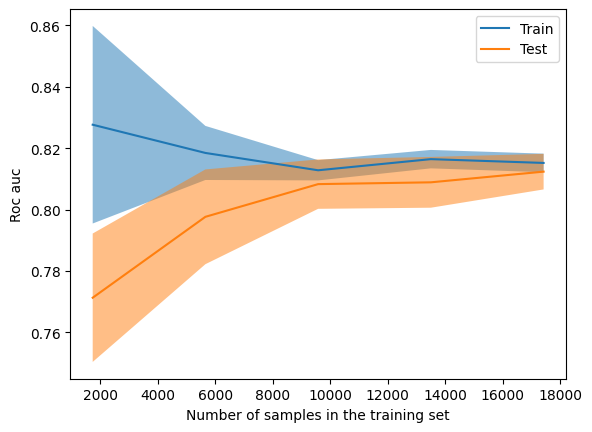

In [274]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(best_model, X_train, y_train, scoring='roc_auc')

**7.6 Model Calibration (Classification Only)**

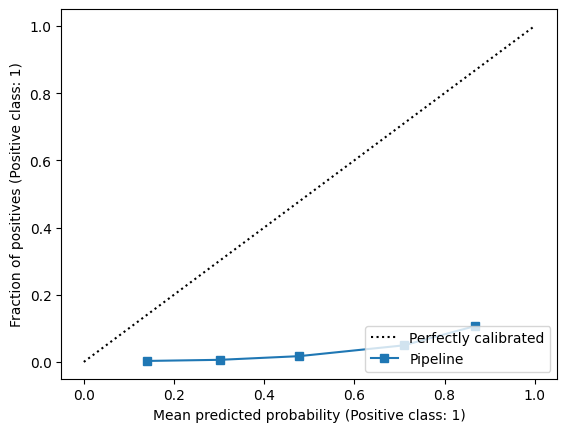

In [275]:
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV

CalibrationDisplay.from_estimator(best_model, X_train, y_train)

In [276]:
clf_calibrated = CalibratedClassifierCV(best_model, method='isotonic')

In [277]:
clf_calibrated.fit(X_train, y_train)

CalibratedClassifierCV(estimator=Pipeline(steps=[('FeatureEngineering',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('scaling_robust',
                                                                                   RobustScaler(),
                                                                                   ['Net '
                                                                                    'Sales',
                                                                                    'Commision '
                                                                                    '(in '
                                                                                    'value)']),
                                                                                  ('one_hot',
                                                                                   OneHotEncoder(drop='first',
                                                                                                 handle_unknown='ignore'),
                                                                                   ['Agency '
                                                                                    'Type',
                                                                                    'Distribution '
                                                                                    'Channel']),
                                                                                  ('binary',
                                                                                   BinaryEncoder(),
                                                                                   ['Agency',
                                                                                    'Product '
                                                                                    'Name'])])),
                                                 ('Resampling',
                                                  RandomOverSampler(random_state=42)),
                                                 ('Classifier',
                                                  LogisticRegression(C=5,
                                                                     class_weight='balanced',
                                                                     max_iter=75,
                                                                     multi_class='multinomial',
                                                                     random_state=42))]),
                       method='isotonic')

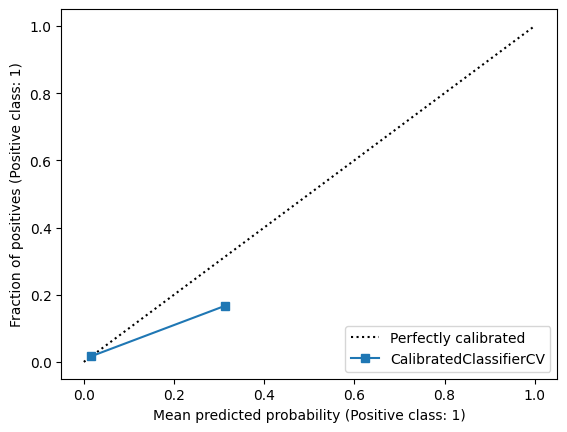

In [278]:
# Classifier after calibration
CalibrationDisplay.from_estimator(clf_calibrated, X_train, y_train)

Confusion Matrix:
[[7145 2028]
 [  44  116]]


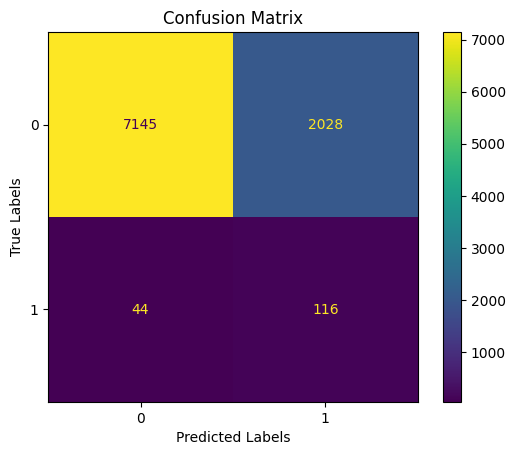

In [279]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Membuat confusion matrix
cm = confusion_matrix(y_test, y_score)

# Menampilkan confusion matrix di terminal
print("Confusion Matrix:")
print(cm)

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap='viridis')  
disp.ax_.set_title("Confusion Matrix")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")
plt.show()

**7.6 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification
- Counter Factual Analysis

In [280]:
model = clf_calibrated.estimator.named_steps['Classifier']
preprocessing = clf_calibrated.estimator.named_steps['FeatureEngineering']

In [281]:
feature_names = preprocessing.get_feature_names_out()

In [282]:
coefficients = model.coef_[0] 

In [287]:
top_10_indices = np.argsort(np.abs(coefficients))[-10:][::-1]
top_10_values = coefficients[top_10_indices]

In [288]:
print("Indeks 10 koefisien terbesar:", top_10_indices)
print("Nilai 10 koefisien terbesar:", top_10_values)

Indeks 10 koefisien terbesar: [ 4  6  8  2  3  5  9  7 11 12]
Nilai 10 koefisien terbesar: [-1.36869364  1.19576579  1.08320853  1.03726531 -0.60301624 -0.46508248
  0.45905614  0.44726079  0.41105844  0.33698668]


In [289]:
top_10_feature_names = [feature_names[i] for i in top_10_indices]

In [290]:
for idx, (name, coef) in enumerate(zip(top_10_feature_names, top_10_values)):
    print(f"{idx+1}. Fitur: {name}, Koefisien: {coef}")

1. Fitur: binary__Agency_0, Koefisien: -1.3686936446504772
2. Fitur: binary__Agency_2, Koefisien: 1.1957657882193558
3. Fitur: binary__Product Name_0, Koefisien: 1.0832085343483409
4. Fitur: one_hot__Agency Type_Travel Agency, Koefisien: 1.037265314645123
5. Fitur: one_hot__Distribution Channel_Online, Koefisien: -0.6030162351931926
6. Fitur: binary__Agency_1, Koefisien: -0.46508248236384075
7. Fitur: binary__Product Name_1, Koefisien: 0.45905614145750173
8. Fitur: binary__Agency_3, Koefisien: 0.44726078773571104
9. Fitur: binary__Product Name_3, Koefisien: 0.41105843962042893
10. Fitur: binary__Product Name_4, Koefisien: 0.33698667560637374


## **Section 8. Model Deployment**

## **Section 9. Model Implementation**

**9.1 How to implement the model ?**


**9.2 What are the limitations of the model ?**

**9.3 Business Calculation (Simulation using unseen data)**

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)
- Conclusion (Business)

**10.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)